In [1]:
# importamos las librerías que necesitamos

import pandas as pd
import numpy as np
from IPython.display import display


In [2]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [4]:
# Cargamos el csv

df = pd.read_csv("Datos_para_visualizaciones.csv", index_col = 0)

In [5]:
def eda(df):
    """
    Realiza un análisis exploratorio de datos sobre un DataFrame:
    - Primeras y últimas filas
    - Dimensiones
    - Tipos de datos
    - Estadísticas numéricas y categóricas
    - Valores únicos
    - Distribución de variables categóricas
    - Resumen general
    - Resumen de outliers (con tipo de dato y porcentaje)
    """
    import pandas as pd

    print("ANÁLISIS EXPLORATORIO DE DATOS\n")

    print("PRIMERAS 10 FILAS:")
    display(df.head(10))

    print("\n ÚLTIMAS 10 FILAS:")
    display(df.tail(10))

    print("\n DIMENSIONES:")
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

    print("\n INFORMACIÓN GENERAL:")
    df.info()

    print("\n TIPOS DE DATOS POR COLUMNA:")
    print(df.dtypes)

    # Columnas numéricas
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        print("\n ESTADÍSTICAS NUMÉRICAS:")
        display(df[num_cols].describe().T)

    # Columnas categóricas
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("\n ESTADÍSTICAS CATEGÓRICAS:")
        display(df[cat_cols].describe())

    # Valores únicos
    print("\n VALORES ÚNICOS POR COLUMNA:")
    display(df.nunique().sort_values(ascending=False))

    # Distribución de variables categóricas
    for col in cat_cols:
        print(f"\n DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: {col}")
        display(df[col].value_counts().head())

    # Resumen general
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Dtype": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().sum() / len(df) * 100).round(2).values
    })
    print("\n RESUMEN GENERAL DE COLUMNAS:")
    display(resumen)

    # --------------------
    # DETECCIÓN DE OUTLIERS (solo columnas con outliers)
    # --------------------
    print("\n RESUMEN DE OUTLIERS (Método IQR):")
    outlier_summary = []

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        pct_outliers = (outliers / len(df) * 100).round(2)

        # Solo guardar si hay outliers
        if outliers > 0:
            outlier_summary.append({
                "Columna": col,
                "Dtype": df[col].dtype,
                "Outliers": outliers,
                "% Outliers": pct_outliers
            })

    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary).sort_values(by="% Outliers", ascending=False)
        display(outlier_df)
    else:
        print(" No se detectaron outliers en columnas numéricas.")

    return resumen,  pd.DataFrame(outlier_summary) if outlier_summary else pd.DataFrame()

In [6]:
resumen = eda(df)  

ANÁLISIS EXPLORATORIO DE DATOS

PRIMERAS 10 FILAS:


,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Salary,Remotework
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,Unknown,2015.72,6,3,Unknown,1,1,F,3,5,Research director,3,Unknown,7,Nan,13,3.0,3,Full time,0,5,3.0,20,15,15,1972,195370.00,yes
No,Unknown,2063.39,1,4,Life sciences,2,3,F,2,5,Manager,3,Unknown,0,Nan,14,3.0,1,Unknown,1,5,3.0,33,11,9,1971,199990.00,yes
No,Travel_rarely,1984.25,4,2,Technical degree,3,3,F,3,5,Manager,4,Married,1,Nan,11,3.0,4,Unknown,0,3,3.0,22,11,15,1981,192320.00,yes
No,Travel_rarely,1771.40,2,4,Medical,4,1,M,3,4,Research director,3,Married,3,Nan,19,3.0,2,Full time,2,2,3.0,20,5,6,1976,171690.00,no
No,Unknown,1582.77,3,3,Technical degree,5,1,M,4,4,Sales executive,1,Divorced,2,Nan,12,3.0,4,Unknown,1,5,3.0,19,2,8,1977,53914.11,no
No,Unknown,1771.92,22,3,Medical,6,4,M,3,4,Manager,4,Unknown,3,Nan,11,3.0,2,Unknown,1,3,3.0,22,4,7,1975,53914.11,yes
No,Unknown,1032.49,25,3,Life sciences,7,1,M,3,3,Sales executive,1,Unknown,7,Nan,11,3.0,4,Part time,0,3,3.0,21,7,9,1964,100071.84,yes
No,Travel_rarely,556.26,1,1,Unknown,8,2,F,3,2,Sales executive,3,Married,1,Nan,25,3.0,3,Part time,0,3,3.0,20,11,6,1981,53914.11,no
No,Unknown,1712.18,2,5,Unknown,9,2,M,3,4,Manager,1,Married,7,Nan,16,3.0,2,Full time,1,2,3.0,18,11,8,1982,165950.00,yes



 ÚLTIMAS 10 FILAS:


,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Salary,Remotework
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yes,Unknown,290.04,2,4,Life sciences,1605,2,M,1,1,Laboratory technician,4,Divorced,4,Nan,13,3.0,3,Part time,1,1,3.0,7,1,0,1982,28111.13,yes
No,Travel_rarely,240.29,7,4,Unknown,1606,2,F,2,1,Sales representative,3,Unknown,3,Nan,15,3.0,2,Part time,0,2,3.0,7,5,2,1992,23290.00,yes
No,Travel_frequently,443.03,1,3,Medical,1607,3,F,2,2,Sales executive,1,Unknown,1,Nan,12,3.0,2,Part time,0,2,3.0,7,0,7,1997,42940.00,yes
No,Unknown,556.26,12,3,Medical,1608,4,M,3,2,Healthcare representative,4,Unknown,0,Nan,11,3.0,3,Part time,2,2,3.0,9,8,5,1992,53914.11,yes
No,Unknown,693.85,3,4,Medical,1609,3,M,3,2,Manufacturing director,1,Married,1,Nan,12,3.0,3,Full time,1,2,3.0,8,6,3,1991,67250.00,yes
Yes,Travel_rarely,1065.28,3,1,Life sciences,1610,3,F,2,3,Sales executive,4,Married,1,Nan,11,3.0,1,Full time,1,6,3.0,16,3,7,1987,103250.00,no
No,Non-travel,458.82,4,2,Unknown,1611,3,F,3,2,Laboratory technician,2,Unknown,1,Nan,12,3.0,2,Part time,0,5,3.0,9,0,8,1978,44470.00,yes
No,Travel_rarely,1032.49,13,5,Unknown,1612,13,F,4,3,Sales executive,3,Single,0,Nan,18,3.0,4,Part time,0,3,3.0,8,0,7,1984,100071.84,yes
No,Non-travel,556.26,8,4,Technical degree,1613,1,F,3,2,Sales executive,4,Divorced,4,Nan,13,3.0,4,Part time,2,3,3.0,7,0,7,1987,53914.11,yes



 DIMENSIONES:
Filas: 1614, Columnas: 28

 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, No to No
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Businesstravel            1614 non-null   object 
 1   Dailyrate                 1614 non-null   float64
 2   Distancefromhome          1614 non-null   int64  
 3   Education                 1614 non-null   int64  
 4   Educationfield            1614 non-null   object 
 5   Employeenumber            1614 non-null   int64  
 6   Environmentsatisfaction   1614 non-null   int64  
 7   Gender                    1614 non-null   object 
 8   Jobinvolvement            1614 non-null   int64  
 9   Joblevel                  1614 non-null   int64  
 10  Jobrole                   1614 non-null   object 
 11  Jobsatisfaction           1614 non-null   int64  
 12  Maritalstatus             1614 non-null   object 
 13  Numco

,count,mean,std,min,25%,50%,75%,max
Dailyrate,1614.0,669.632150,472.352414,104.1,290.04,556.26,967.315,2063.39
Distancefromhome,1614.0,11.141884,10.450560,1.0,2.00,8.00,17.000,49.00
Education,1614.0,2.925031,1.022357,1.0,2.00,3.00,4.000,5.00
Employeenumber,1614.0,807.500000,466.065982,1.0,404.25,807.50,1210.750,1614.00
Environmentsatisfaction,1614.0,4.294919,6.993559,1.0,2.00,3.00,4.000,49.00
Jobinvolvement,1614.0,2.739777,0.711567,1.0,2.00,3.00,3.000,4.00
Joblevel,1614.0,2.068154,1.101344,1.0,1.00,2.00,3.000,5.00
Jobsatisfaction,1614.0,2.738538,1.106163,1.0,2.00,3.00,4.000,4.00
Numcompaniesworked,1614.0,2.673482,2.506152,0.0,1.00,2.00,4.000,9.00
Percentsalaryhike,1614.0,15.165428,3.648610,11.0,12.00,14.00,18.000,25.00



 ESTADÍSTICAS CATEGÓRICAS:


,Businesstravel,Educationfield,Gender,Jobrole,Maritalstatus,Overtime,Standardhours,Remotework
count,1614,1614,1614,1614,1614,1614,1614,1614
unique,4,7,2,9,5,1,3,2
top,Unknown,Unknown,F,Sales executive,Unknown,Nan,Part time,yes
freq,772,745,971,369,651,1614,888,1000



 VALORES ÚNICOS POR COLUMNA:


Employeenumber              1614
Dailyrate                    673
Salary                       583
Distancefromhome              49
Datebirth                     43
Environmentsatisfaction       38
Yearsatcompany                37
Yearswithcurrmanager          18
Yearssincelastpromotion       16
Percentsalaryhike             15
Numcompaniesworked            10
Jobrole                        9
Educationfield                 7
Trainingtimeslastyear          7
Maritalstatus                  5
Joblevel                       5
Education                      5
Jobsatisfaction                4
Jobinvolvement                 4
Businesstravel                 4
Stockoptionlevel               4
Relationshipsatisfaction       4
Standardhours                  3
Gender                         2
Remotework                     2
Overtime                       1
Performancerating              1
Worklifebalance                1
dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Businesstravel


Businesstravel
Unknown              772
Travel_rarely        586
Travel_frequently    165
Non-travel            91
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Educationfield


Educationfield
Unknown             745
Life sciences       349
Medical             276
Marketing           104
Technical degree     69
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Gender


Gender
F    971
M    643
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Jobrole


Jobrole
Sales executive              369
Research scientist           314
Laboratory technician        278
Manufacturing director       158
Healthcare representative    149
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Maritalstatus


Maritalstatus
Unknown     651
Married     404
Single      325
Divorced    199
Marreid      35
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Overtime


Overtime
Nan    1614
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Standardhours


Standardhours
Part time    888
Full time    388
Unknown      338
Name: count, dtype: int64


 DISTRIBUCIÓN DE LA VARIABLE CATEGÓRICA: Remotework


Remotework
yes    1000
no      614
Name: count, dtype: int64


 RESUMEN GENERAL DE COLUMNAS:


,Columna,Dtype,Valores únicos,% Nulos
Businesstravel,Businesstravel,object,4,0.0
Dailyrate,Dailyrate,float64,673,0.0
Distancefromhome,Distancefromhome,int64,49,0.0
Education,Education,int64,5,0.0
Educationfield,Educationfield,object,7,0.0
Employeenumber,Employeenumber,int64,1614,0.0
Environmentsatisfaction,Environmentsatisfaction,int64,38,0.0
Gender,Gender,object,2,0.0
Jobinvolvement,Jobinvolvement,int64,4,0.0
Joblevel,Joblevel,int64,5,0.0



 RESUMEN DE OUTLIERS (Método IQR):


,Columna,Dtype,Outliers,% Outliers
5,Trainingtimeslastyear,int64,268,16.60
9,Salary,float64,166,10.29
7,Yearssincelastpromotion,int64,116,7.19
6,Yearsatcompany,int64,114,7.06
2,Environmentsatisfaction,int64,100,6.20
4,Stockoptionlevel,int64,89,5.51
3,Numcompaniesworked,int64,59,3.66
1,Distancefromhome,int64,40,2.48
0,Dailyrate,float64,18,1.12
8,Yearswithcurrmanager,int64,16,0.99


In [7]:
# importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np
from IPython.display import display


# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# CONFIGURACIÓN GLOBAL DE ESTILO
# ===============================
sns.set_theme(style="whitegrid", palette="deep")

def graficar_columnas(df, col=None, bins=30, figsize=(12, 5)):
    """
    Genera gráficos automáticos para complementar el EDA (Análisis Exploratorio de Datos).
    -------------------------------------------------------------------------------------
    OBJETIVO:
    Visualizar la distribución y comportamiento de las variables antes de tratar nulos,
    outliers o transformar datos.

    FUNCIONALIDAD:
    ---------------
    - Variables numéricas → Histograma + KDE + Boxplot horizontal.
      Incluye líneas de media, mediana y moda.
    - Variables categóricas → Gráfico de barras ordenado por frecuencia.
    - Mapa de calor de correlaciones → Detecta relaciones lineales entre variables numéricas.

    PARÁMETROS:
    ------------
    df : pd.DataFrame
        DataFrame a analizar.
    col : str, opcional
        Si se pasa, solo se grafica esa columna.
    bins : int, opcional
        Número de intervalos para el histograma (por defecto=30).
    figsize : tuple, opcional
        Tamaño base de las figuras (ancho, alto).
    """

    # ===========================================================
    # Selección de columnas
    # ===========================================================
    if col:
        if col not in df.columns:
            print(f"La columna '{col}' no existe en el DataFrame.")
            return
        cols = [col]
    else:
        cols = df.columns.tolist()

    # ===========================================================
    # Clasificación por tipo de dato
    # ===========================================================
    num_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
    cat_cols = [c for c in cols if not pd.api.types.is_numeric_dtype(df[c])]

    # ===========================================================
    # Variables numéricas → Histograma + Boxplot
    # ===========================================================
    for c in num_cols:
        serie = df[c].dropna()

        # Medidas estadísticas
        media = serie.mean()
        mediana = serie.median()
        try:
            moda = serie.mode()[0]
        except:
            moda = None

        fig, axes = plt.subplots(1, 2, figsize=figsize)

        # HISTOGRAMA + KDE
        sns.histplot(
            serie, bins=bins, kde=True, ax=axes[0],
            color=sns.color_palette("deep")[0], alpha=0.7
        )
        axes[0].set_title(f"Histograma de {c}", fontsize=13)
        axes[0].set_xlabel(c)
        axes[0].set_ylabel("Frecuencia")

        # Líneas de referencia: media, mediana, moda
        axes[0].axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")
        axes[0].axvline(mediana, color="green", linestyle="-.", linewidth=2, label=f"Mediana: {mediana:.2f}")
        if moda is not None:
            axes[0].axvline(moda, color="blue", linestyle=":", linewidth=2, label=f"Moda: {moda:.2f}")
        axes[0].legend()

        # BOXPLOT → útil para detectar outliers
        sns.boxplot(x=serie, ax=axes[1], color=sns.color_palette("deep")[2])
        axes[1].set_title(f"Boxplot de {c}", fontsize=13)
        axes[1].set_xlabel(c)
        axes[1].axvline(media, color="red", linestyle="--", linewidth=2)
        axes[1].axvline(mediana, color="green", linestyle="-.", linewidth=2)
        if moda is not None:
            axes[1].axvline(moda, color="blue", linestyle=":", linewidth=2)

        plt.suptitle(f"Análisis de la variable numérica '{c}'", fontsize=15, fontweight="bold")
        plt.tight_layout()
        plt.show()

    # ===========================================================
    # Variables categóricas → Gráfico de barras
    # ===========================================================
    for c in cat_cols:
        serie = df[c].dropna()
        value_counts = serie.value_counts()

        plt.figure(figsize=figsize)
        sns.barplot(
            x=value_counts.index,
            y=value_counts.values,
            palette="viridis",
            alpha=0.85,
            order=value_counts.index
        )
        plt.title(f"Distribución de categorías en '{c}'", fontsize=15, fontweight="bold")
        plt.xlabel(c)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    # ===========================================================
    # Mapa de calor de correlaciones (versión mejorada)
    # ===========================================================
    # Este gráfico muestra cómo se relacionan las variables numéricas entre sí.
    # Es muy útil para detectar redundancia, multicolinealidad o relaciones relevantes.
    
    # Copiamos el dataframe para limpiar sin modificar el original
    df_corr = df.copy()

    # Intentar convertir columnas tipo 'object' que podrían ser numéricas (e.g. '195370,00$')
    for col in df_corr.columns:
        if df_corr[col].dtype == 'object':
            df_corr[col] = (
                df_corr[col]
                .replace('[\$,]', '', regex=True)   # Elimina símbolos como $, ,
                .str.replace(',', '.', regex=False)  # Sustituye comas por puntos decimales
            )
            df_corr[col] = pd.to_numeric(df_corr[col], errors='ignore')

    # Seleccionamos solo columnas numéricas limpias
    num_corr = df_corr.select_dtypes(include='number')

    if num_corr.shape[1] > 1:
        # Ajusta el tamaño de la figura según el número de columnas
        n_cols = num_corr.shape[1]
        plt.figure(figsize=(max(10, n_cols * 0.6), max(8, n_cols * 0.5)))

        # Calculamos la matriz de correlaciones
        corr = num_corr.corr()

        # Generamos el mapa de calor
        sns.heatmap(
            corr,
            annot=True,           # Mostrar valores numéricos
            cmap="coolwarm",      # Escala de color (azul-negativo / rojo-positivo)
            fmt=".2f",            # 2 decimales
            square=True,          # Celdas cuadradas
            linewidths=0.5,       # Líneas separadoras para legibilidad
            cbar_kws={'shrink': 0.8},
            annot_kws={"size": 8} # Tamaño del texto dentro de cada celda
        )

        plt.title(
            "Mapa de calor de correlaciones entre variables numéricas",
            fontsize=15,
            fontweight="bold",
            pad=20
        )
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()

    else:
        print("\nNo hay suficientes variables numéricas para generar un mapa de correlaciones.")

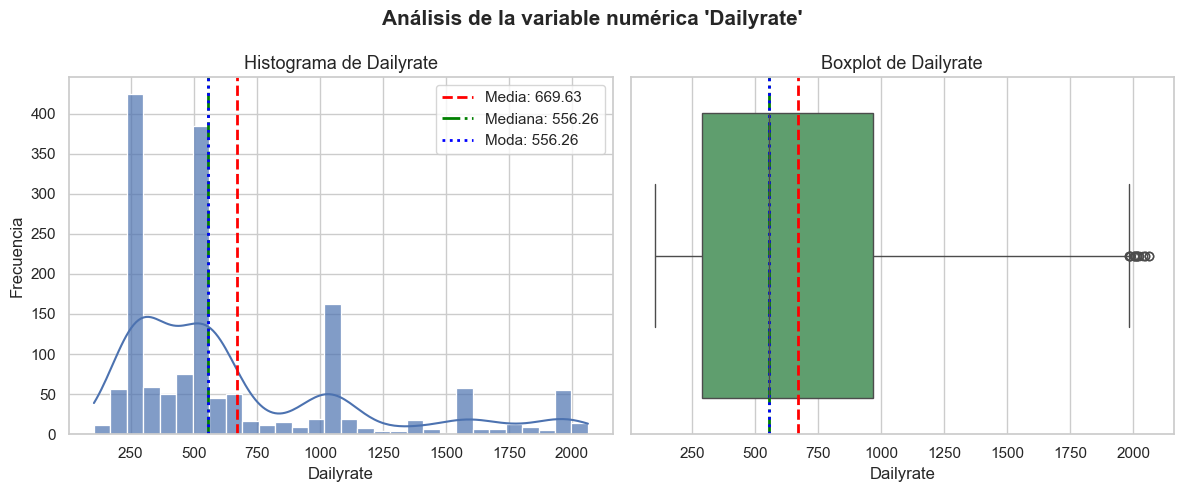

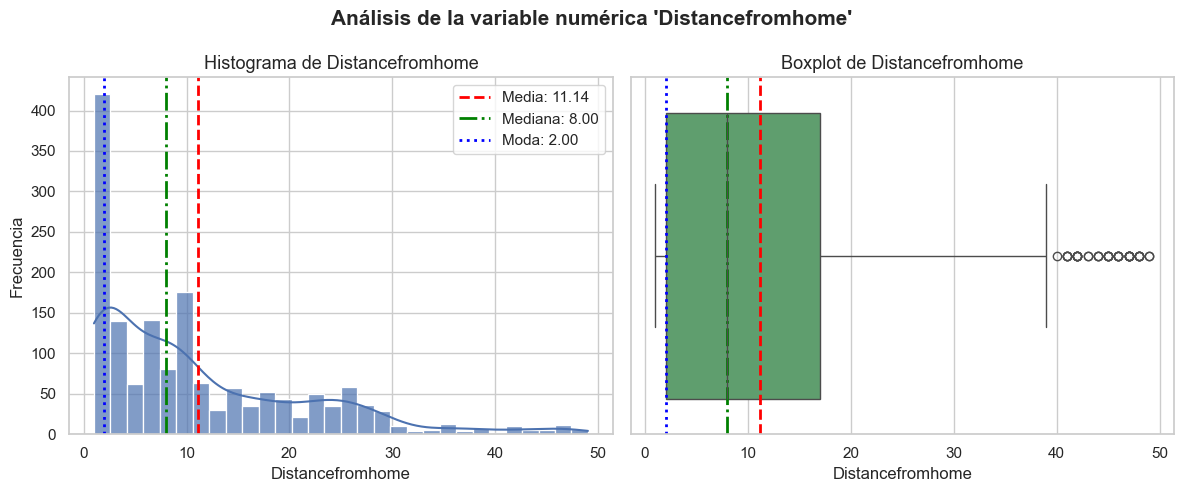

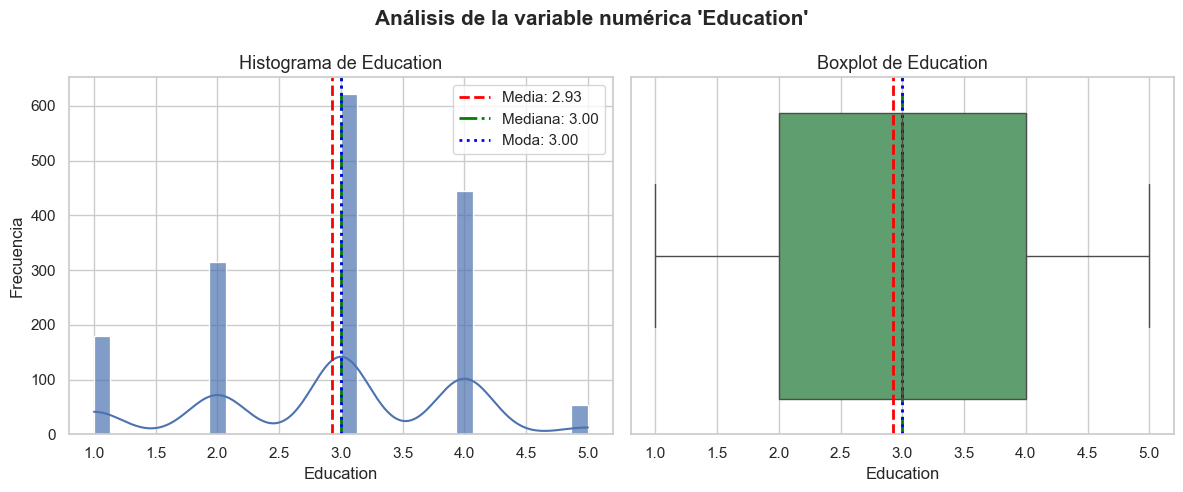

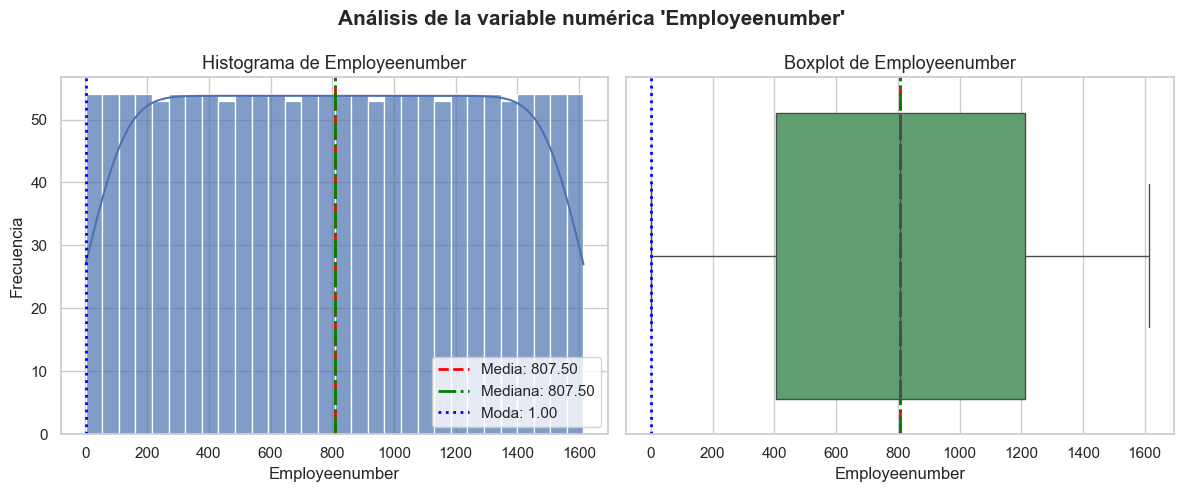

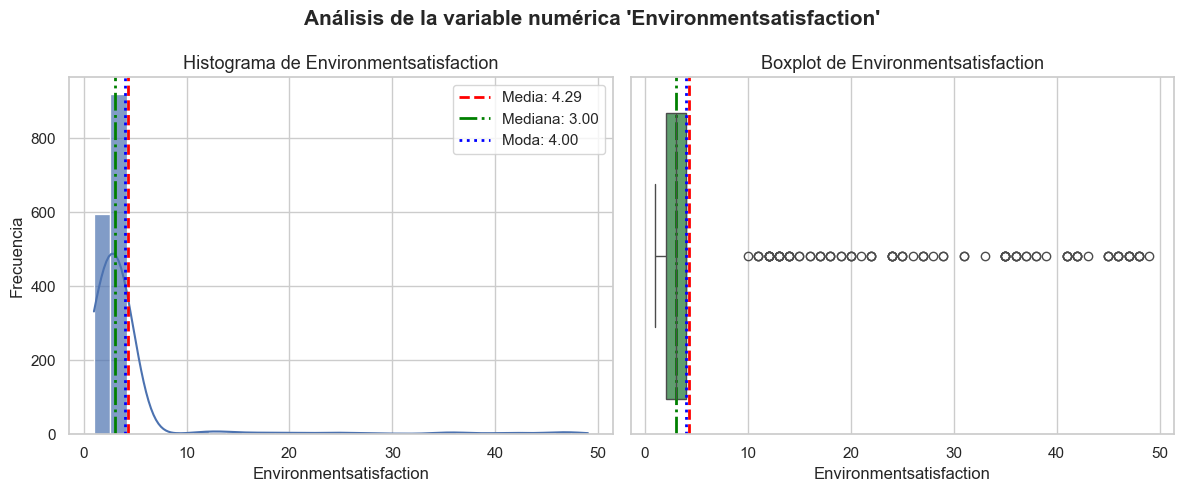

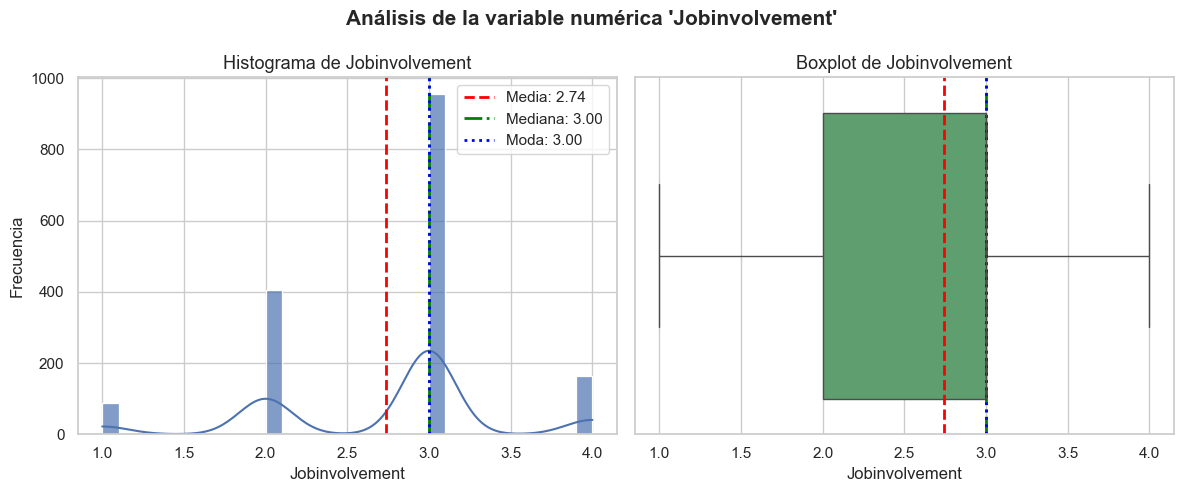

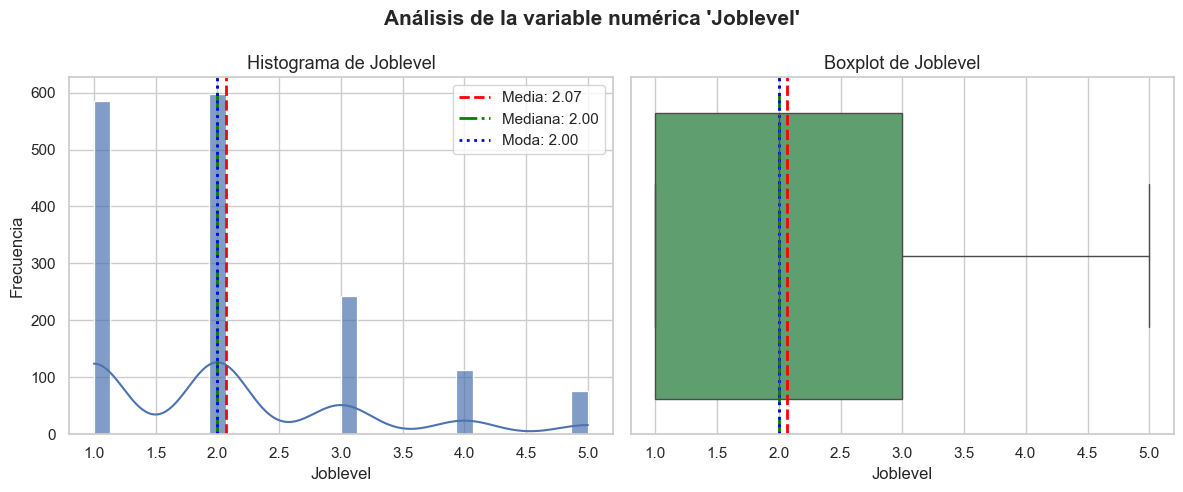

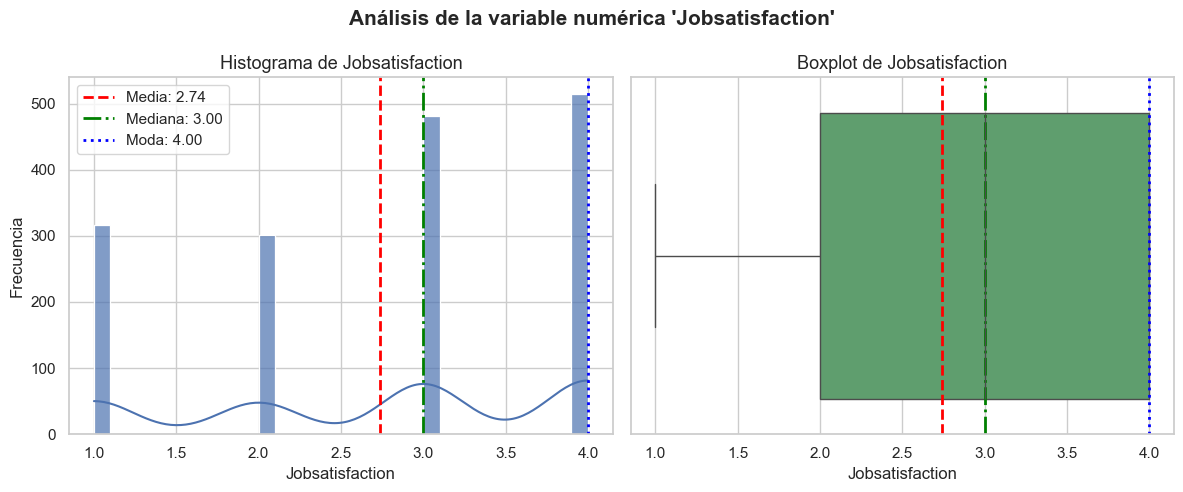

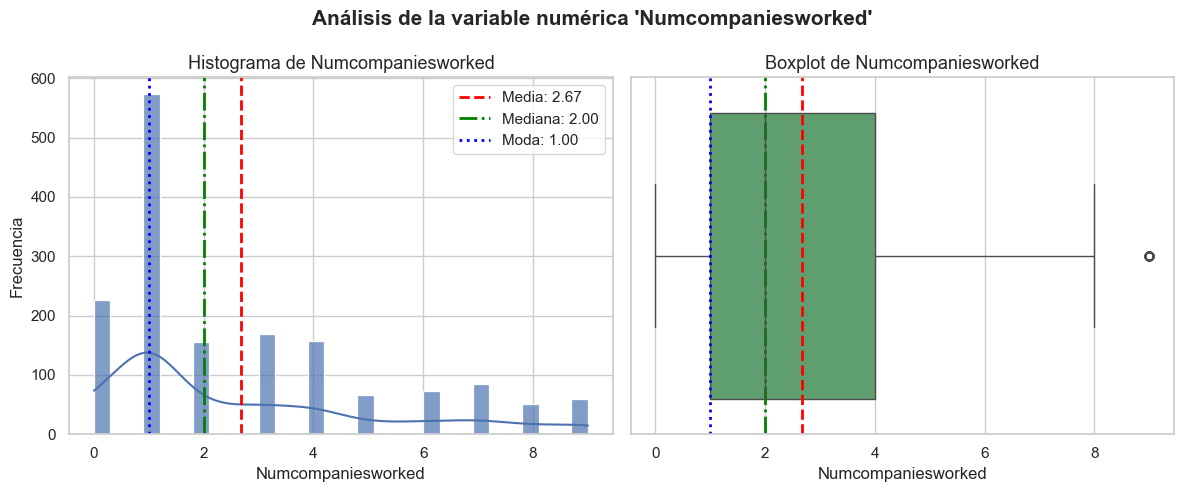

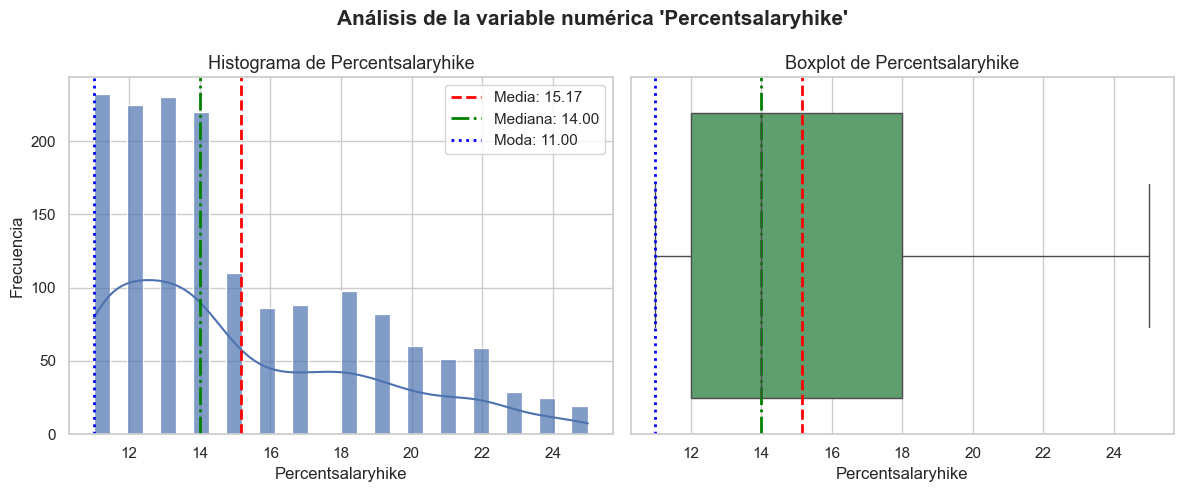

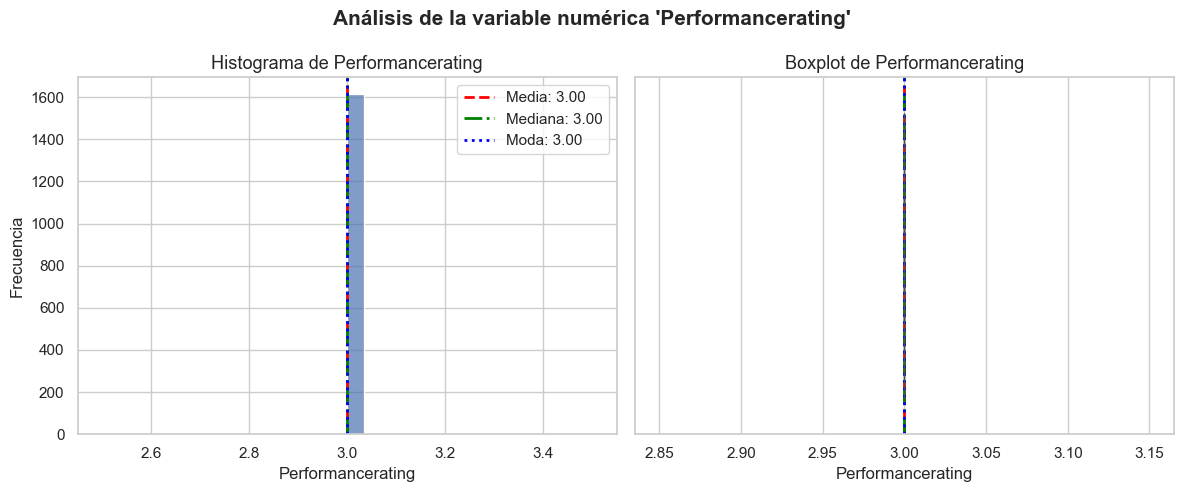

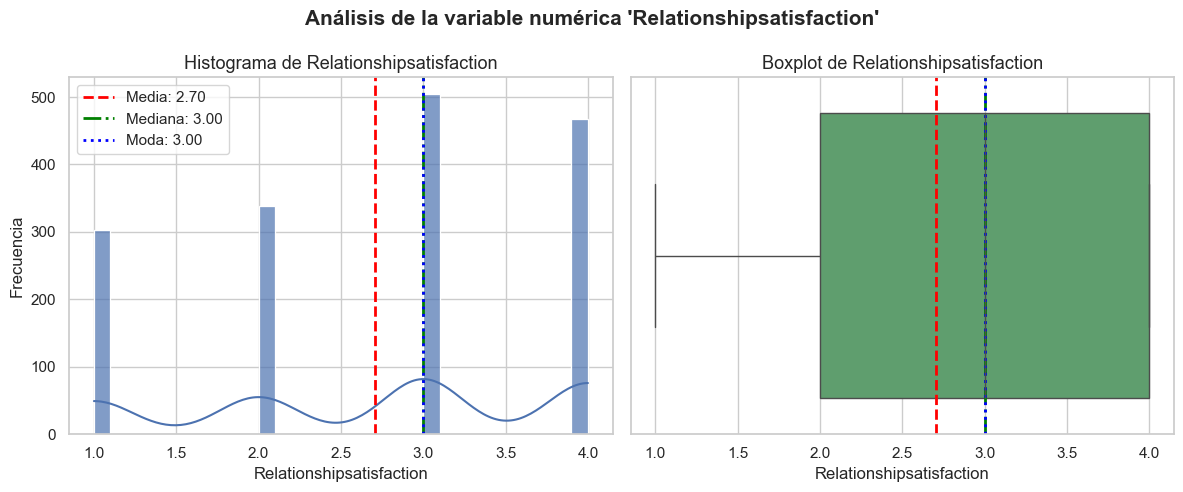

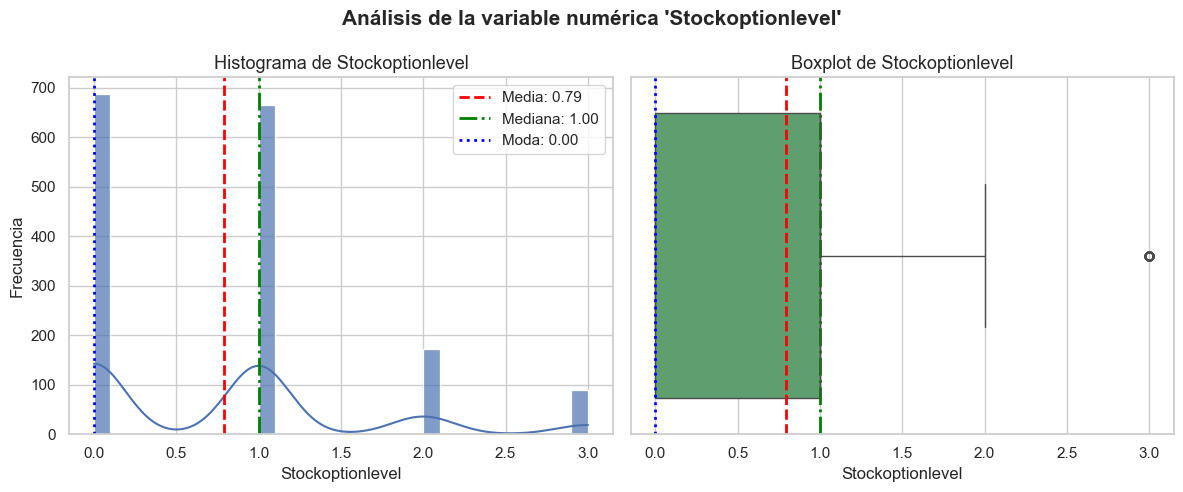

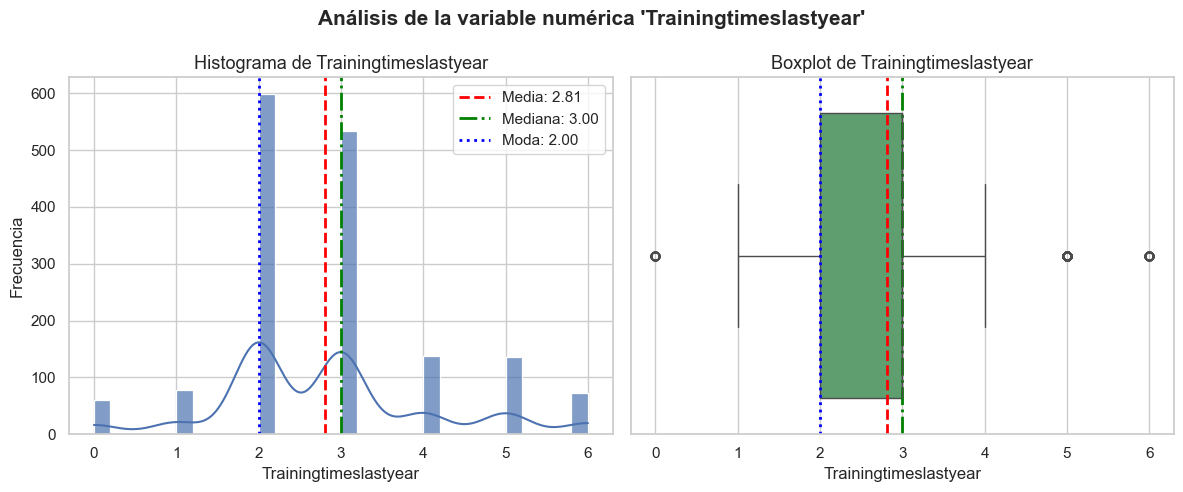

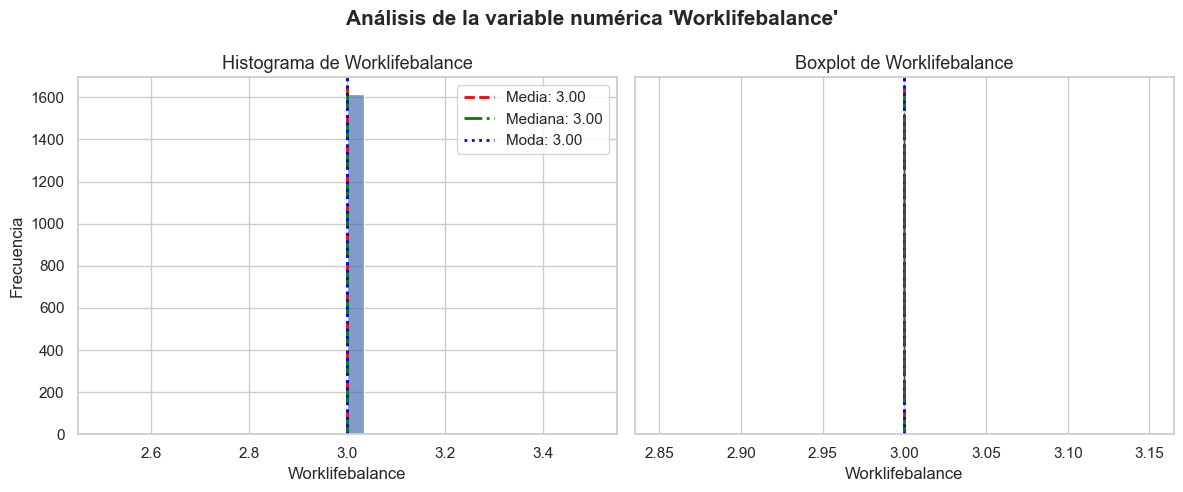

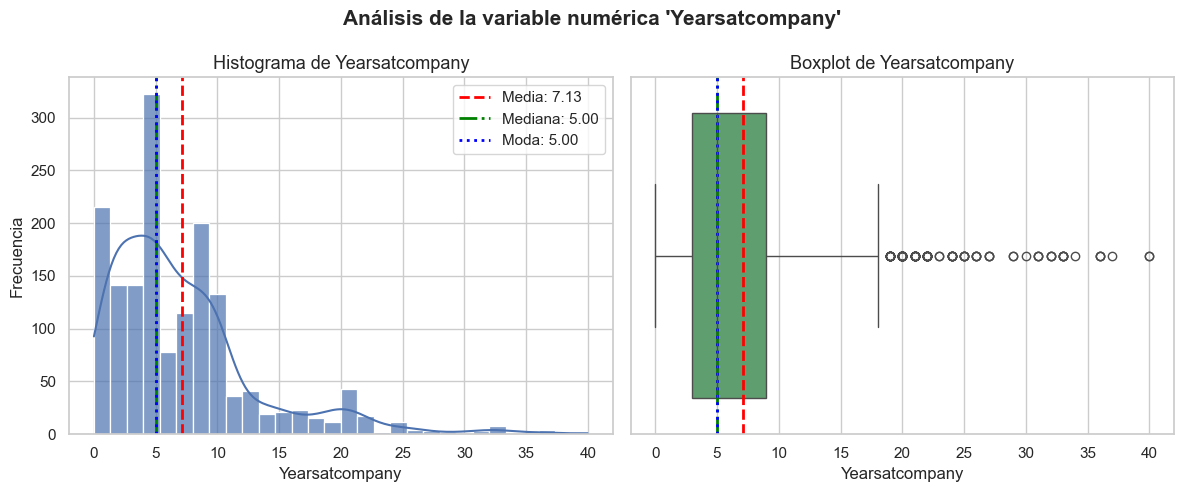

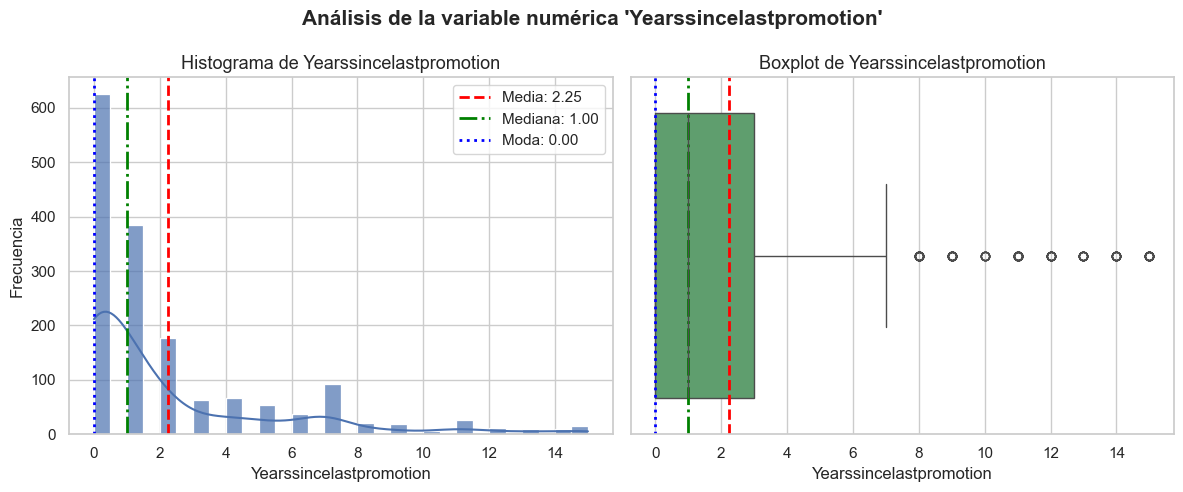

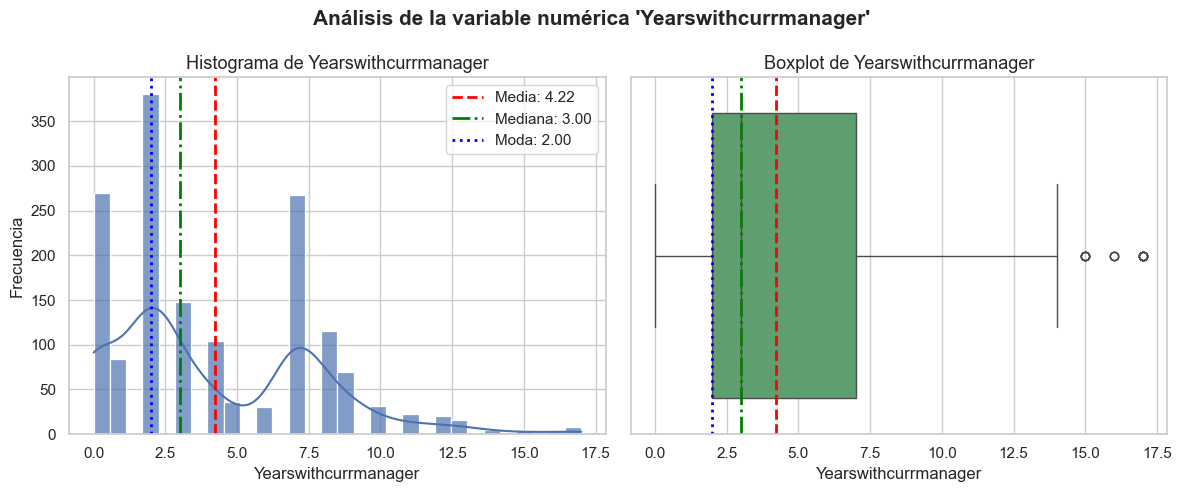

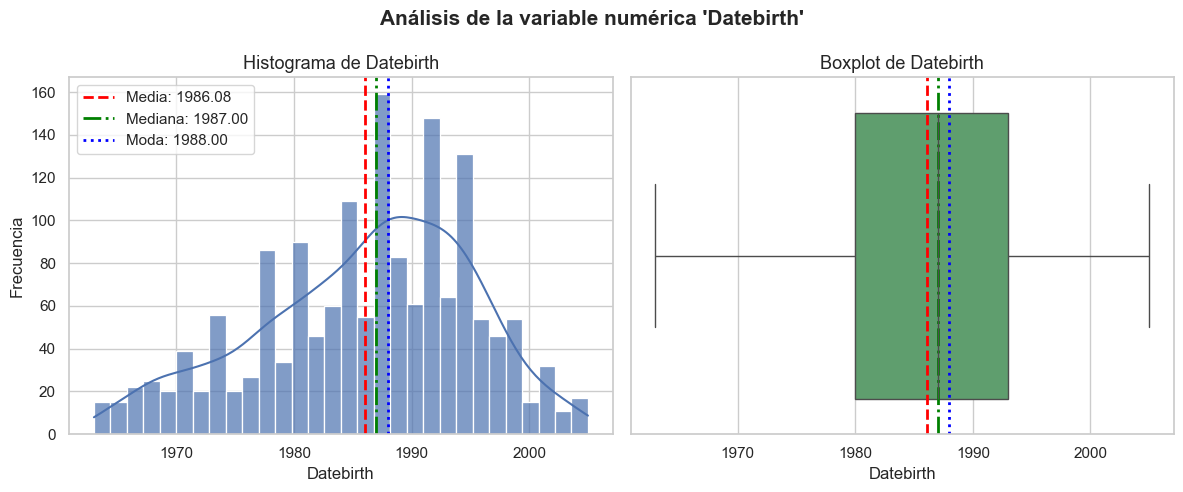

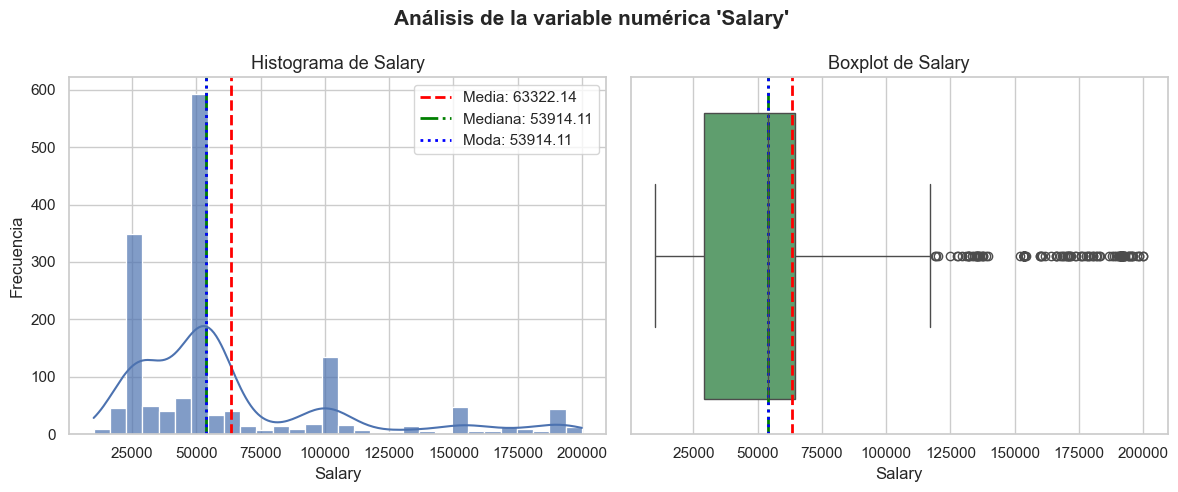

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


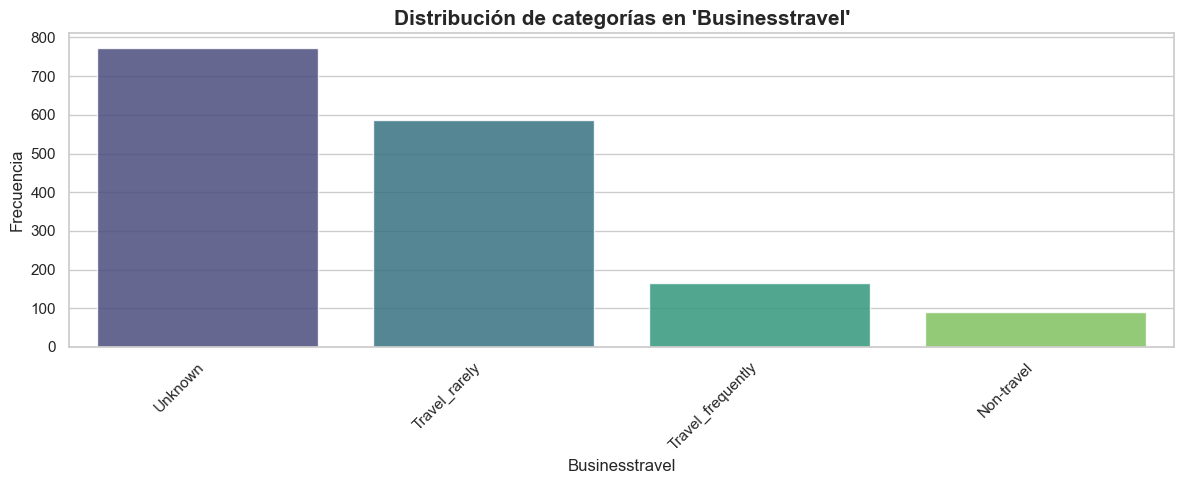

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


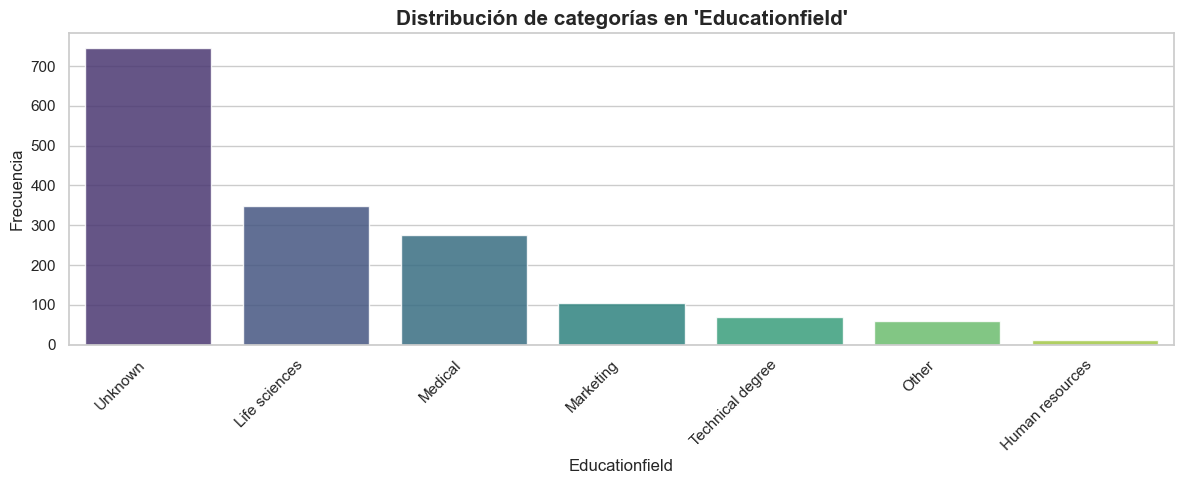

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


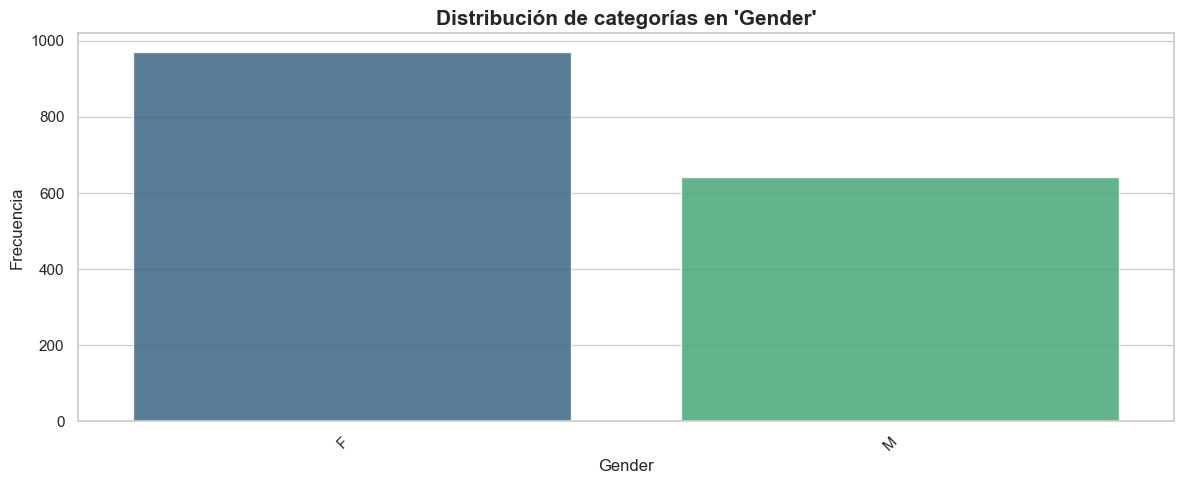

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


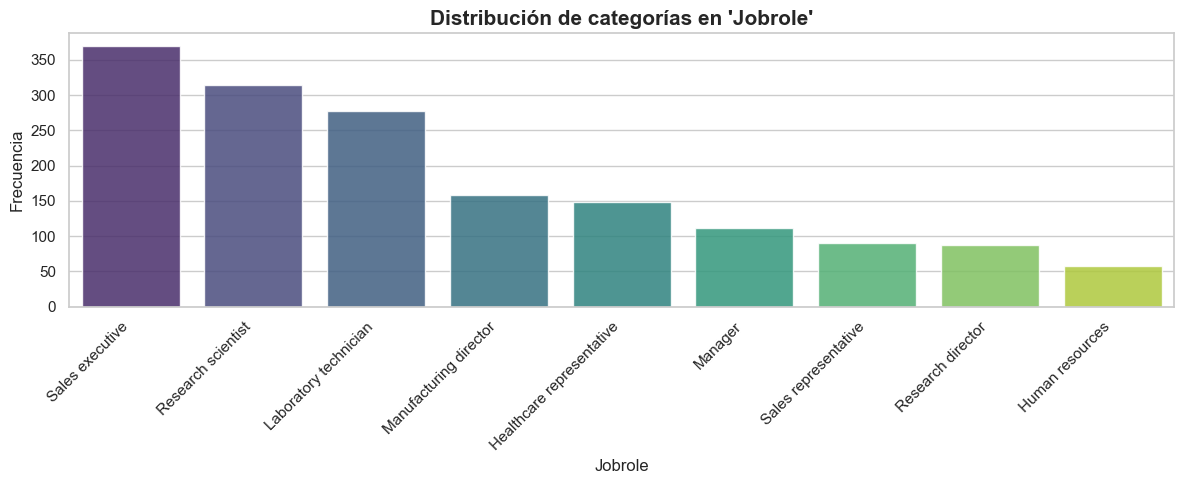

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


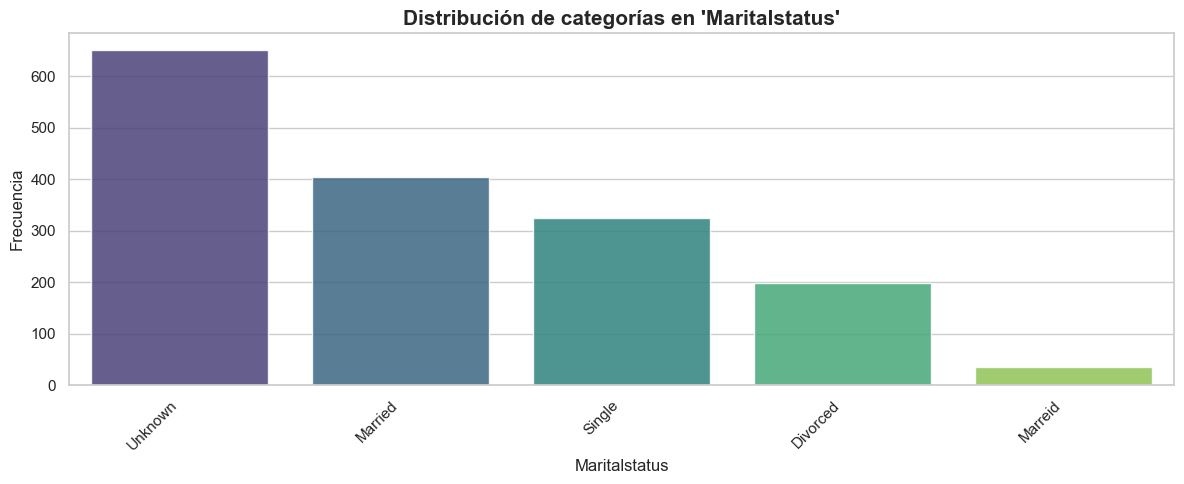

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


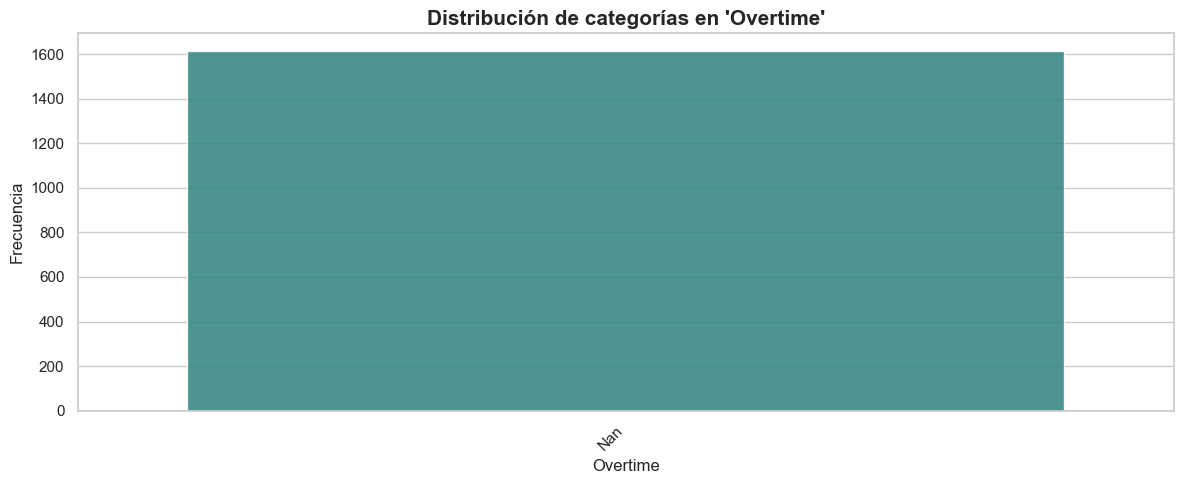

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


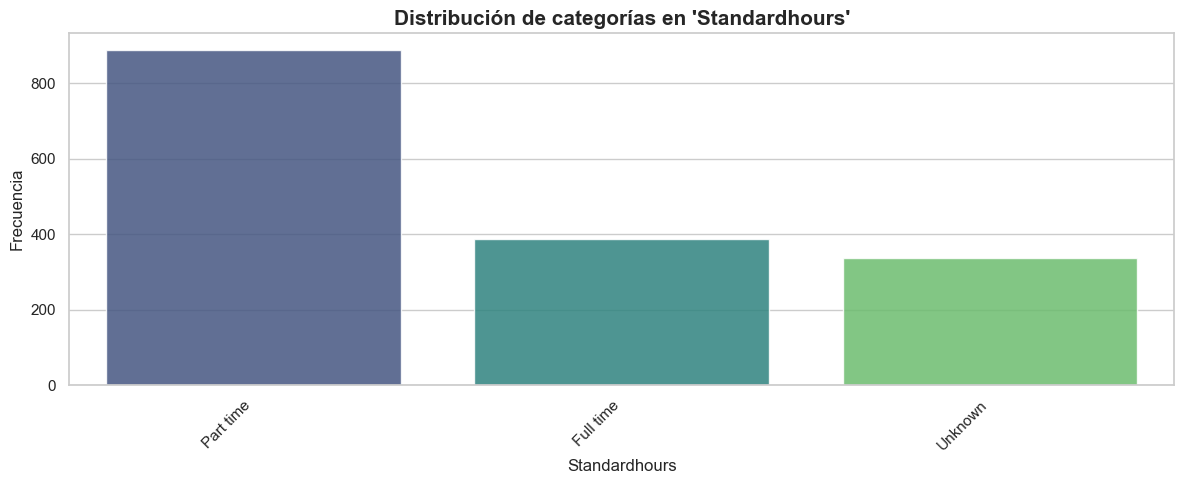

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


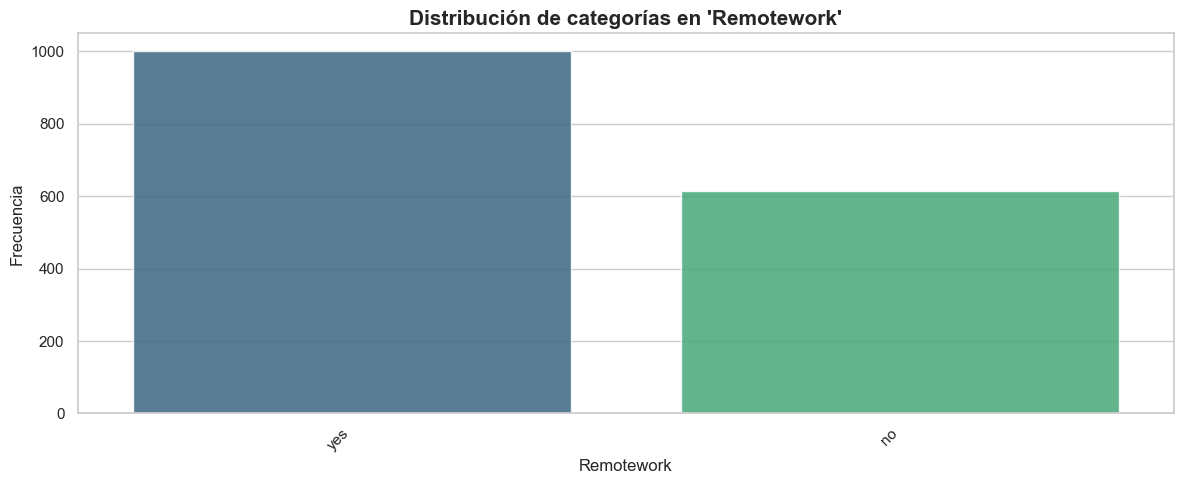

C:\Users\apdue\AppData\Local\Temp\ipykernel_19912\1891029534.py:138: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_corr[col] = pd.to_numeric(df_corr[col], errors='ignore')


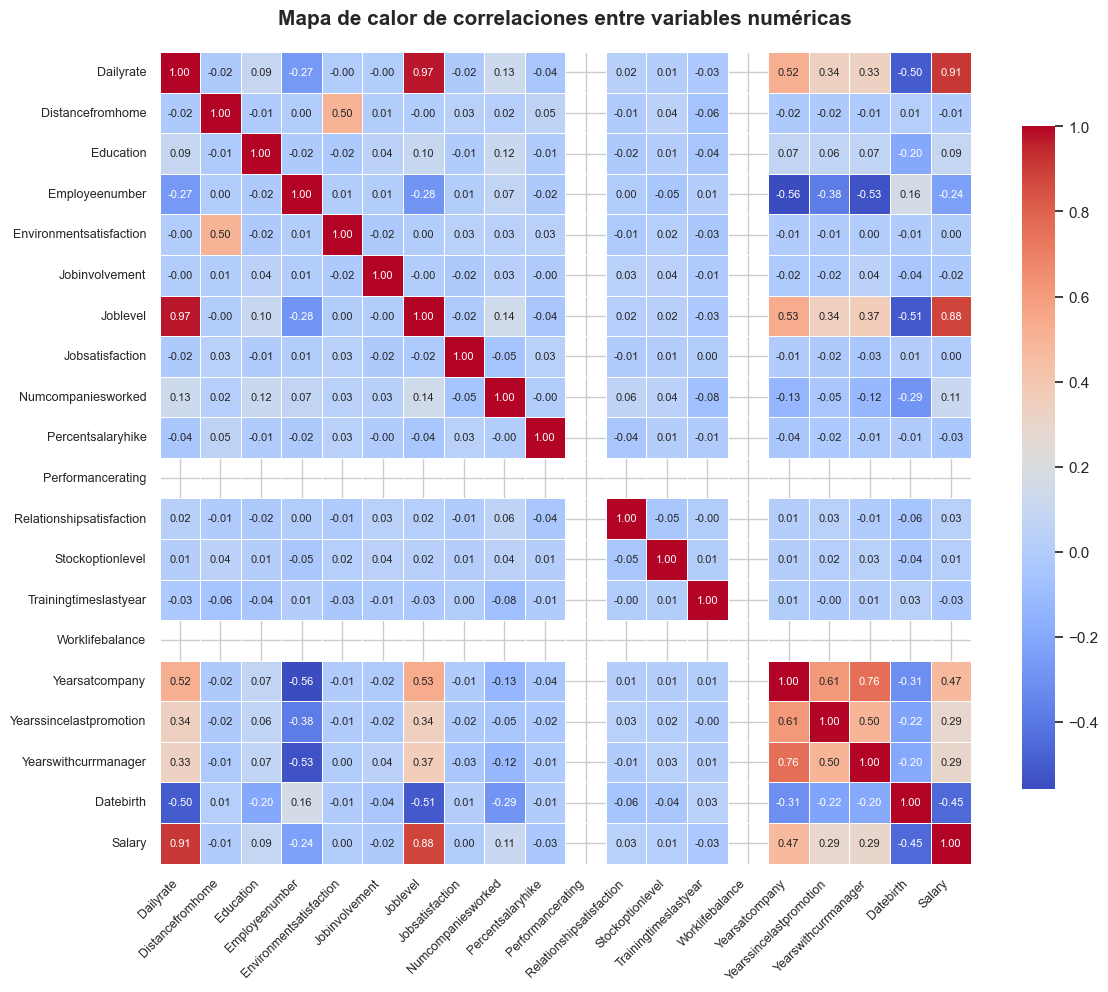

In [9]:
# Visualizar TODAS las columnas
graficar_columnas(df)